# Supervised Learning with scikit-learn

## Requirements
- **No Missing Values**
- Data in **numeric format**
- Data stored in **DataFrame** or **NumPy array**

## scikit-learn Syntax

```python
from sklearn.module import Model
model = Model()
model.fit(X, y)
predictions = model.predict(X_new)
print(predictions)



## k-Nearest Neighbors (k-NN)

- **Binary classification** algorithm
- Predicts the label of a data point by:
  * Looking at the `k` closest labeled data points
  * Taking a **majority vote**

### 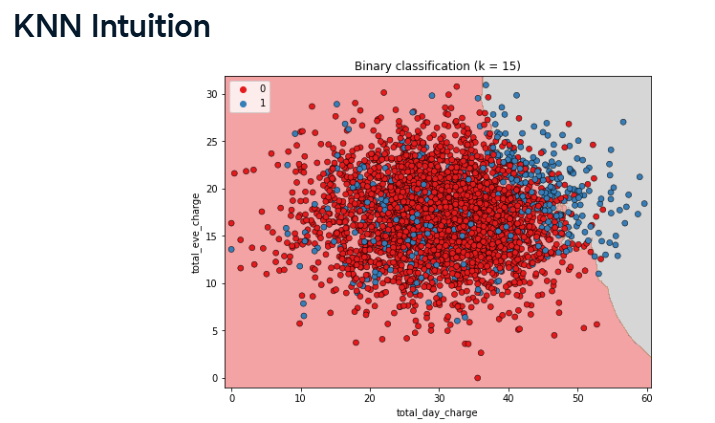

### Using the Syntax
```python
from sklearn.neighbors import KNeighborsClassifier
X = my_df[['feature1', 'feature2']].values            # 2D DataFrame of features
y = my_df['target'].values                           # 1D series of target status values

# Instantiate the model and fit the training data to the model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

# Bring in the test data
X_new = np.array([[56.8, 17.5], [24.4, 24.1], [50.1, 10.9]])   # 3 data points to be classified

# Make predictions
predictions = knn.predict(X_new)                    # returns an array of prediction values for each data point 

### Practice

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

churn_df = pd.read_csv('telecom_churn_clean.csv')

y = churn_df["churn"].values                       # binary: churn or no churn
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X,y)

# test data
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


## Measuring Model Performance

- **Accuracy** - the proportion of correct predictions
- How do we measure accuracy?
- Computing accuracy based on the training data doesn't indicate ability to get unseen data correct

### Split Data Into:
- **Training data** - used to train the model
- **Test data** - used to evaluate the model

### Using `train_test_split()`
```python
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
```

```python
from sklearn.model_selection import train_test_split

# Initialize training and test data
# random_state controls shuffling. Pass the same int for consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# Instantiate the model and fit the training data
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# Check accuracy with .score()
score = knn.score(X_test, y_test)
print(score)
```
### Model Complexity, Overfitting and Underfitting
- **Larger k values** = less complex = can cause **underfitting**
- **Smaller k values** = more complex = can cause **overfitting**

### Optimizing Complexity
- The idea is to iterate test results over a range of complexities to maximize accuracy

```python
# Initialize empty dicts for training and test accuracy
train_accuracy = {}
test_accuracy = {}

# Initialize an array of k values
neighbors = np.arange(1, 26)

# Use a for loop to iterate the training, testing, scoring workflow
for neighbor in neighbors:
    # Instantiate the model and fit the training data
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)

    # Calculate accuracy and record
    train_accuracy[neighbor] = knn.score(X_train, y_train)
    test_accuracy[neighbor] = knn.score(X_test, y_test)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title('KNN: Varying number of neighbors')
plt.plot(neighbors, train_accuracy.values(), label='Training Accuracy')
plt.plot(neighbors, test_accuracy.values(), label='Test Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
```

### Practice

In [2]:
# Import the module
from sklearn.model_selection import train_test_split
import pandas as pd

churn_df = pd.read_csv('telecom_churn_clean.csv')

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X,y)

# Print the accuracy
print(knn.score(X_test,y_test))


0.8860569715142429


In [3]:
# Create neighbors
neighbors = np.arange(1,13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)



[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.8885971492873218, np.int64(3): 0.8994748687171793, np.int64(4): 0.8750937734433608, np.int64(5): 0.878469617404351, np.int64(6): 0.8660915228807202, np.int64(7): 0.8705926481620405, np.int64(8): 0.8615903975993998, np.int64(9): 0.86384096024006, np.int64(10): 0.858589647411853, np.int64(11): 0.8604651162790697, np.int64(12): 0.8574643660915229} 
 {np.int64(1): 0.7856071964017991, np.int64(2): 0.8470764617691154, np.int64(3): 0.8320839580209896, np.int64(4): 0.856071964017991, np.int64(5): 0.8545727136431784, np.int64(6): 0.8590704647676162, np.int64(7): 0.8605697151424287, np.int64(8): 0.8620689655172413, np.int64(9): 0.863568215892054, np.int64(10): 0.8605697151424287, np.int64(11): 0.8605697151424287, np.int64(12): 0.8605697151424287}


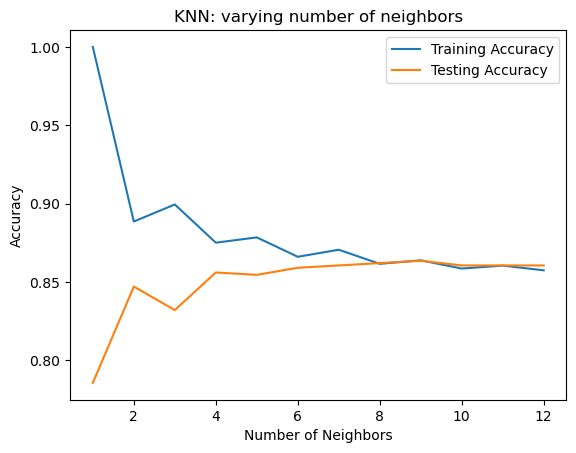

In [4]:
import matplotlib.pyplot as plt
# plot the results
# Add a title
plt.title("KNN: varying number of neighbors")

# Plot training accuracies
plt.plot(neighbors,train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

## Linear Regression

### Creating Features Practice
- Create **X**, an array of the values from the sales_df DataFrame's "radio" column
- Create **y**, an array of the values from the sales_df DataFrame's "sales" column  
- Reshape **X** into a two-dimensional **NumPy array**
- Print the shape of **X** and **y**

In [5]:
# load the df
sales_df = pd.read_csv('advertising_and_sales_clean (1).csv')

# create an array X from the values of the 'radio' column
X = sales_df['radio'].values


# create an array y from the values of the 'sales' column
y = sales_df['sales'].values


# reshape X into a 2d array.
X = np.reshape(X,(-1,1))

# print the shape of x and y
print(f"X shape: {X.shape} \n y shape: {y.shape}")

X shape: (4546, 1) 
 y shape: (4546,)


### Build a Linear Regression Model

In [6]:
# import LinearRegression
from sklearn.linear_model import LinearRegression

# Instantiate a linear regression model
reg = LinearRegression()

# fit the model
reg.fit(X,y)

# make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


### Visualize a Linear Regression Model


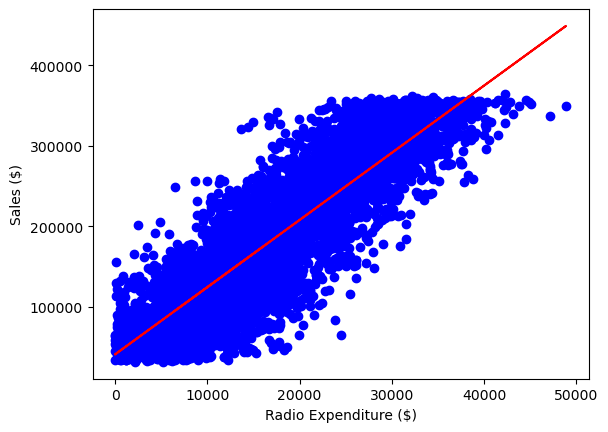

In [7]:
# import pyplot
import matplotlib.pyplot as plt

# create a scatter plot
plt.scatter(X, y, color = "blue")

# create a line plot
plt.plot(X, predictions, color = 'red')
plt.xlabel("Radio Expenditure ($)")
plt.ylabel('Sales ($)')

# display the plot
plt.show()

### Fit and Predict for Regression

In [8]:
# create an X array containing values of all features in sales_df
numerical_features = sales_df[['tv', 'radio', 'social_media']]
X = numerical_features.to_numpy()

# create a y containing all the sales values
y = sales_df['sales'].values

# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# instantiate a LInearRegression
reg = LinearRegression()

# fit the model to the data
reg.fit(X_train, y_train)

# create y_pred, making predictions for sales using the test features
y_pred = reg.predict(X_test)
print(f"Predictions: {y_pred[:2]} \n Actual Values: {y[:2]}")


Predictions: [53176.66154234 70996.19873235] 
 Actual Values: [54732.76 46677.9 ]


### Regression Performance


In [9]:
# Import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.433199600101


## Cross-Validation
- Used to validate if **R²** is meaningful
- Split the data into 5 **'folds'**:
  - Use fold 1 as the test, and train on the rest, compute the metric
  - Then repeat using each fold as a test
```python 
from sklearn.model_selection import cross_val_score, KFold

# Instantiate the KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Instantiate LinearRegression
reg = LinearRegression()

# Call cross_val_score
cv_results = cross_val_score(reg, X, y, cv=kf)    # Default metric is R²

# Print metrics
print(cv_results)
print(np.mean(cv_results))
print(np.std(cv_results))
print(np.quantile(cv_results, [0.025, 0.975]))
```

In [10]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


In [11]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


## Regularization
- **Penalizes large coefficients** in a loss function

### Ridge Regression
**Adds the squared magnitude of coefficients as a penalty term**
**OLS loss function + α × Σ ai²**

- **α** is a **hyperparameter**: a variable used to optimize model parameters
- **α** controls model complexity (when α = 0, model is **OLS**)

```python
from sklearn.linear_model import Ridge

scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)
```

### Lasso Regression
- **OLS loss function + α × Σ |ai|**
- **Adds the absolute value of the magnitude of coefficients as a penalty term**
- **Lasso** can select important features of a dataset
- **Shrinks the coefficients** of less important features to 0
- Features not shrunk to zero are **selected by Lasso**

```python
from sklearn.linear_model import Lasso

scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)
```

In [12]:
# import Ridge
from sklearn.linear_model import Ridge

scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    score = ridge.score(X_test, y_test)
    scores.append(score)
print(scores)
    

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387]


[ 3.56256962 -0.00397035  0.00496385]
Index(['tv', 'radio', 'social_media'], dtype='object')


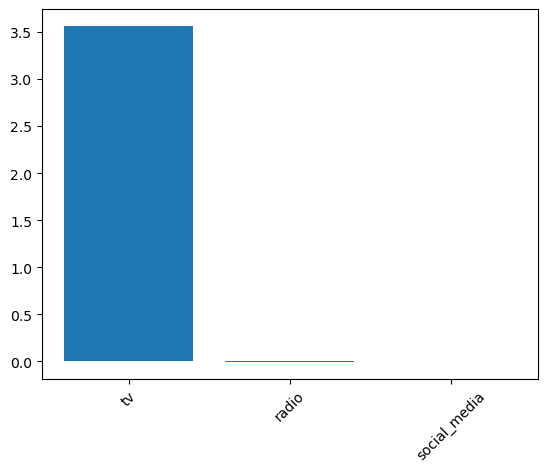

In [13]:
# Import Lasso
from sklearn.linear_model import Lasso

# assign the sales_columns to a variable
sales_columns = sales_df[['tv', 'radio', 'social_media']].columns

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
print(sales_columns)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

## Fine Tuning the Model

### Class Imbalance
- Caused by an uneven frequency of classes
- Example: Fraudulent Bank Transactions
  - 99% are legitimate and 1% are fraud
  - A classifier model that only predicts legitimate transactions will have 99% accuracy, but would be useless to detect fraud

### Confusion Matrix
- A 2x2 matrix that categorizes True Negatives, False Positives, False Negatives, and True Positives

|                      | Predicted Negative | Predicted Positive |
|----------------------|:------------------:|:------------------:|
| **Actual Negative**  | True Negative      | False Positive     |
| **Actual Positive**  | False Negative     | True Positive      |

### Confusion Matrix Metrics

#### Precision
```
true positives / (true positives + false positives)
```
- Also known as **positive predictive value**
- High precision = lower false positive rate
- In bank example: high precision means fewer legitimate transactions flagged

#### Recall
```
true positives / (true positives + false negatives)
```
- Also known as **sensitivity**
- High recall = lower false negative rate
- In example: high recall means most fraudulent transactions are flagged

#### F1 Score
```
2 * (precision * recall) / (precision + recall)
```
- The **harmonic mean** of precision and recall
- It gives equal weight to both
- It accounts for both number of errors and type of errors

### Confusion Matrix in scikit-learn
```python
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print the classification report (includes metrics)
print(classification_report(y_test, y_pred))
```



### Practice


In [14]:
# Import necessary modules
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Load the data
churn_df = pd.read_csv('telecom_churn_clean.csv')

# Create feature matrix and target array
X = churn_df[['account_length', 'customer_service_calls']].values
y = churn_df['churn'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1128   10]
 [ 190    6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1138
           1       0.38      0.03      0.06       196

    accuracy                           0.85      1334
   macro avg       0.62      0.51      0.49      1334
weighted avg       0.79      0.85      0.79      1334



### Logistic Regression and ROC Curve

#### Logistic Regression
- Used for classification problems
- Outputs probabilities
- If p > 0.5: data is labeled as 1
- If p < 0.5: data is labeled as 0

```python
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Generate the probabilities that the test data belongs in either class
# Slice the data for the positive class
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
```

#### ROC Curve
- The default threshold for logistic regression is 0.5
- It can be adjusted to change true positive vs false positive rates
- The ROC curve visualizes the effects of changing the threshold

```python
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Unpack the ROC curve into false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Plot the curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
```

#### Area Under Curve (AUC)
- Scores from 0-1, 1 is perfect, 0.5 is random guesses

```python
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred_probs))
```

## Hyperparameter tuning
**Hyperparameters:** parameters we specify before fitting the model
- alpha in ridge/lasso
- n_neighbors in KNN

**Choosing the correct hyperparameters**
1. try lots of different hyperparameter values
2. fit all of them seperately
3. see how well they perform
4. choose the best performing values

**Must use cross-validation to avoid overfitting to the test set**

**We split the data and perform cross-validation on the training set**

**the test set is withheld for the final evaluation**

### Grid search cross-validation

- choose a set of hyperparameters for tuning
- perform k-fold cross-validation on the training set
- choose the best performing combination
- **limited** because number of fits rises linearly


|n_neighbors | euclidian  | manhattan |
|--------:|-----------:|----------:|  
|  11    |    0.8716   |   0.8692  |
|  8     |    0.8704   |   0.8688  |
|  5     |    0.8748   |   0.8714  |
|  2     |    0.8634   |   0.8646  |

```python
from sklearn.model_selection import GridSearchCV

# instantiate kfold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# instantiate the hyperparameters to be tested as a dict
param_grid{'alpha': np.arrange(0.0001, 1, 10),
            'solver': ['sag', 'lsqr']}

# instantiate model
ridge = Ridge()

# perform the gridsearch -> returns a gridsearch object
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)

# fit the gridseach object to the training data
ridge_cv.fit(X_train, y_train)

# print the results
print(ridge_cv.best_params_, ridge_cv.best_score_)
```

### RandomizedSeachCV

```python
from sklearn.model_selection import RandomizedSearchCV

# instantiate kfold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# instantiate the hyperparameters to be tested as a dict
param_grid{'alpha': np.arrange(0.0001, 1, 10),
            'solver': ['sag', 'lsqr']}

# instantiate model
ridge = Ridge()

# perform the RandomizedSearch -> returns a RandomizedSearch object
# set the n_iter value to control how many fits (n_iter * n_splits)
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)

# fit the search object to the training data
ridge_cv.fit(X_train, y_train)

# print the results
print(ridge_cv.best_params_, ridge_cv.best_score_)
```

## Preprocessing data

### **Categorical features**
- must be converted to numerical values
- convert to binary features called dummy variables

**dummy variable example**
- genres of music could be listed each as its own feature
- a 1 or 0 value in that feature indicates if the song is in that particular genre
- can delete the last feature in the list, because if the song is not in any other genre, it is implicity in the last genre.

**libraries to deal with categorical features**
- scikit-learn: OneHotEncoder()
  ```python
  TODO
  ```
- pandas: get_dummies()
  
```python
import pandas as pd

music_df = pd.read_csv('music.csv')

# create a df that contains binary dummy features
# drop_first removes 1 feature
music_dummies = pd.get_dummies(music_df['genre'], drop_first=True)

# add the dummy features to the original df
music_dummies = pd.concat([music_df, music_dummies], axis=1)

# drop the categorical genre column
music_dummies = music_dummies.drop('genre', axis=1)
```
### Missing Data
**counting missing data**
```python
print(music_df.isna().sum().sort_values())
```

**Drop missing data**
- common practice to drop rows if the number of rows dropping is 5% or less of the data
```python
music_df = music_df.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])
```

**Imputing Values**
- using subject matter expertise to fill in data with educated guesses
- could use the mean, meadian, or other appropriate values
- data **must be split** before imputing to avoid data leakage
```python
from sklearn.impute import SimpleImputer

# create a categorical feature set
X_cat = music_df['genre'].values.reshape(-1, 1)

# create a numerical feature set
X_num = music_df.drop(['genre', 'popularity'], axis=1).values

# create targets
y = music_df['popularity'].values

# split both feature sets. use same value for random_state
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=12)

X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=12)

# instantiate simple imputer
imp_cat= SimpleImputer(strategy='most_frequent')

# impute the missing values
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

# repeat with numerical data
imp_num = SimpleImputer()    # default value is mean
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)

# add numerical and categoricals back  together
X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)
```
### Imputing within a pipeline

**example**
A classifier that classifies whether a song is rock or not
```python
from sklearn.pipeline import PipeLine

# drop missing values less than 5% 
music_df = music_df.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])

# convert values in target column to 0 or 1
music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1, 0)

# create X and y
X = music_df.drop['genre', axis=1].values
y = music_df['genre'].values

# create steps for the pipeline
steps = [('imputation', SimpleImputer()),
        ('logistic_regression', LogisticRegression())]

# Instantiate the pipeline
pipeline = PipeLine(steps)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit the pipeline
pipeline.fit(X_train, y_train)

# compute accuracy
pipeline.score(X_test, y_test)

### Practice


AUC Score: 0.6345766252417362


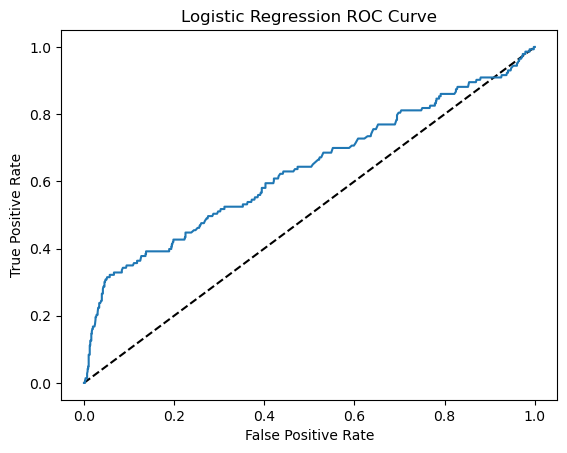

In [15]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
churn_df = pd.read_csv('telecom_churn_clean.csv')

# Create feature matrix and target array
X = churn_df[['account_length', 'customer_service_calls']].values
y = churn_df['churn'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Get prediction probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"AUC Score: {auc_score}")

# Create ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


## Hyperparameter Tuning

### Hyperparameters
**Hyperparameters:** parameters we specify before fitting the model
- `alpha` in Ridge/Lasso regression
- `n_neighbors` in KNN

### Choosing the Correct Hyperparameters
1. Try lots of different hyperparameter values
2. Fit all of them separately
3. See how well they perform
4. Choose the best performing values

**Must use cross-validation to avoid overfitting to the test set**

**We split the data and perform cross-validation on the training set**

**The test set is withheld for the final evaluation**


### Grid Search Cross-Validation
- Choose a set of hyperparameters for tuning
- Perform k-fold cross-validation on the training set
- Choose the best performing combination
- **Limited** because number of fits rises linearly

#### Example Results Table
| n_neighbors | Euclidean | Manhattan |
|------------:|----------:|----------:|
| 11          | 0.8716    | 0.8692    |
| 8           | 0.8704    | 0.8688    |
| 5           | 0.8748    | 0.8714    |
| 2           | 0.8634    | 0.8646    |

```python
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge
import numpy as np

# Instantiate KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the hyperparameters to be tested as a dict
param_grid = {'alpha': np.arange(0.0001, 1, 10),
              'solver': ['sag', 'lsqr']}

# Instantiate model
ridge = Ridge()

# Perform the grid search -> returns a GridSearchCV object
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)

# Fit the grid search object to the training data
ridge_cv.fit(X_train, y_train)

# Print the results
print(ridge_cv.best_params_, ridge_cv.best_score_)
```


### RandomizedSearchCV

```python
from sklearn.model_selection import RandomizedSearchCV

# Instantiate KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the hyperparameters to be tested as a dict
param_grid = {'alpha': np.arange(0.0001, 1, 10),
              'solver': ['sag', 'lsqr']}

# Instantiate model
ridge = Ridge()

# Perform the RandomizedSearch -> returns a RandomizedSearchCV object
# Set the n_iter value to control how many fits (n_iter * n_splits)
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)

# Fit the search object to the training data
ridge_cv.fit(X_train, y_train)

# Print the results
print(ridge_cv.best_params_, ridge_cv.best_score_)
```


### Practice


In [16]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the data
churn_df = pd.read_csv('telecom_churn_clean.csv')

# Create feature matrix and target array
X = churn_df[['account_length', 'customer_service_calls']].values
y = churn_df['churn'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define parameter grid for KNN
param_grid = {'n_neighbors': np.arange(1, 21),
              'metric': ['euclidean', 'manhattan']}

# Instantiate KNN classifier
knn = KNeighborsClassifier()

# Perform grid search
knn_cv = GridSearchCV(knn, param_grid, cv=kf)

# Fit the grid search object
knn_cv.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", knn_cv.best_params_)
print("Best cross-validation score:", knn_cv.best_score_)
print("Test set score:", knn_cv.score(X_test, y_test))


Best parameters: {'metric': 'manhattan', 'n_neighbors': np.int64(6)}
Best cross-validation score: 0.8564005477387397
Test set score: 0.859


## Preprocessing Data

### Categorical Features
- Must be converted to numerical values
- Convert to binary features called dummy variables

#### Dummy Variable Example
- Genres of music could be listed each as its own feature
- A 1 or 0 value in that feature indicates if the song is in that particular genre
- Can delete the last feature in the list, because if the song is not in any other genre, it is implicitly in the last genre

#### Libraries to Deal with Categorical Features
- **scikit-learn**: `OneHotEncoder()`
- **pandas**: `get_dummies()`

```python
import pandas as pd

music_df = pd.read_csv('music.csv')

# Create a df that contains binary dummy features
# drop_first removes 1 feature
music_dummies = pd.get_dummies(music_df['genre'], drop_first=True)

# Add the dummy features to the original df
music_dummies = pd.concat([music_df, music_dummies], axis=1)

# Drop the categorical genre column
music_dummies = music_dummies.drop('genre', axis=1)
```


### Missing Data

#### Counting Missing Data
```python
print(music_df.isna().sum().sort_values())
```

#### Drop Missing Data
- Common practice to drop rows if the number of rows dropping is 5% or less of the data
```python
music_df = music_df.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])
```

#### Imputing Values
- Using subject matter expertise to fill in data with educated guesses
- Could use the mean, median, or other appropriate values
- Data **must be split** before imputing to avoid data leakage

```python
from sklearn.impute import SimpleImputer

# Create a categorical feature set
X_cat = music_df['genre'].values.reshape(-1, 1)

# Create a numerical feature set
X_num = music_df.drop(['genre', 'popularity'], axis=1).values

# Create targets
y = music_df['popularity'].values

# Split both feature sets (use same value for random_state)
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=12)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=12)

# Instantiate simple imputer
imp_cat = SimpleImputer(strategy='most_frequent')

# Impute the missing values
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

# Repeat with numerical data
imp_num = SimpleImputer()    # default value is mean
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)

# Add numerical and categoricals back together
X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)
```


### Imputing within a Pipeline

#### Example
A classifier that classifies whether a song is rock or not

```python
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import numpy as np

# Drop missing values less than 5% 
music_df = music_df.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])

# Convert values in target column to 0 or 1
music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1, 0)

# Create X and y
X = music_df.drop('genre', axis=1).values
y = music_df['genre'].values

# Create steps for the pipeline
steps = [('imputation', SimpleImputer()),
         ('logistic_regression', LogisticRegression())]

# Instantiate the pipeline
pipeline = Pipeline(steps)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Compute accuracy
pipeline.score(X_test, y_test)
```


### Practice


In [17]:
# Import necessary modules
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load and examine the data
churn_df = pd.read_csv('telecom_churn_clean.csv')

# Check for missing values
print("Missing values per column:")
print(churn_df.isna().sum().sort_values(ascending=False))

# Create dummy variables for categorical features (if any)
# For this dataset, let's assume we need to create a binary classification
# Convert churn to binary if it's not already
churn_df['churn_binary'] = np.where(churn_df['churn'] == 1, 1, 0)

# Create feature matrix and target
X = churn_df[['account_length', 'customer_service_calls']].values
y = churn_df['churn_binary'].values

# Create a pipeline with imputation and logistic regression
steps = [('imputation', SimpleImputer(strategy='mean')),
         ('logistic_regression', LogisticRegression())]

pipeline = Pipeline(steps)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"\nTraining accuracy: {train_score:.4f}")
print(f"Test accuracy: {test_score:.4f}")


Missing values per column:
Unnamed: 0                0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

Training accuracy: 0.8560
Test accuracy: 0.8560
